In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [ ]:
data = pd.read_csv('/content/Hotel Reservations.csv')

In [ ]:
data.head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


In [ ]:
file = open('Book.pkl', 'rb')
pre = pickle.load(file)

In [ ]:
data.rename(columns={'type_of_meal_plan':'mealplan', 'market_segment_type': 'segement', 'room_type_reserved':'roomtype' }, inplace=True)

In [ ]:
data1 = data[['mealplan', 'segement', 'roomtype', 'booking_status']]

In [ ]:
a = pre.fit_transform(data1)
data1 = pd.DataFrame(a)

In [ ]:
data1.columns = ['mealplan', 'segement', 'roomtype', 'booking_status']

In [ ]:
data1.columns

Index(['mealplan', 'segement', 'roomtype', 'booking_status'], dtype='object')

In [ ]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'mealplan', 'required_car_parking_space',
       'roomtype', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'segement', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
data.rename(columns={'no_of_adults':'adults', 'no_of_children' :'children', 'no_of_weekend_nights' :'weekend',
                     'no_of_week_nights': 'weekday', 'required_car_parking_space': 'parking',
                     'avg_price_per_room':'price'}, inplace=True)

In [ ]:
data2 = data[['adults', 'children', 'weekend', 'weekday', 'parking', 'price']]

In [ ]:
data3 = pd.concat([data1, data2], axis=1)

In [ ]:
data3.columns

Index(['mealplan', 'segement', 'roomtype', 'booking_status', 'adults',
       'children', 'weekend', 'weekday', 'parking', 'price'],
      dtype='object')

In [ ]:
data3.isnull().sum()

,0
mealplan,0
segement,0
roomtype,0
booking_status,0
adults,0
children,0
weekend,0
weekday,0
parking,0
price,0


In [ ]:
num_cols=data3.select_dtypes(include='number').columns
cat_cols=data3.select_dtypes(include='object').columns

In [ ]:
cat_cols

Index([], dtype='object')

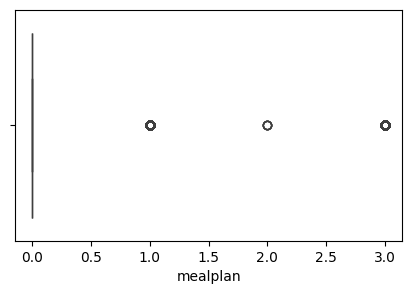

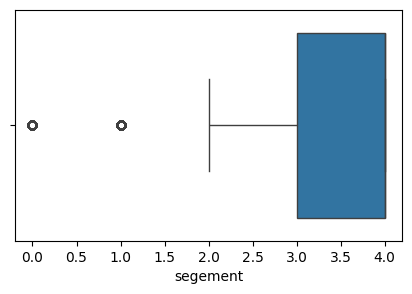

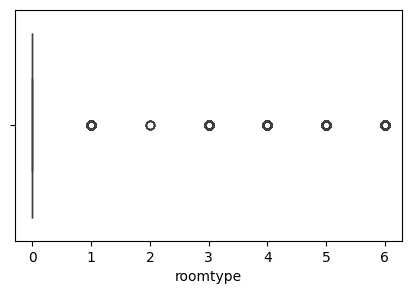

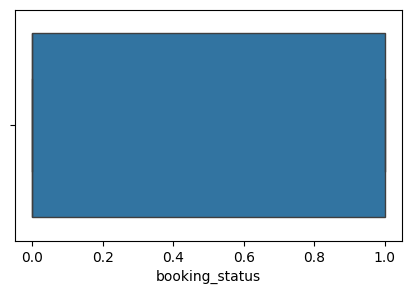

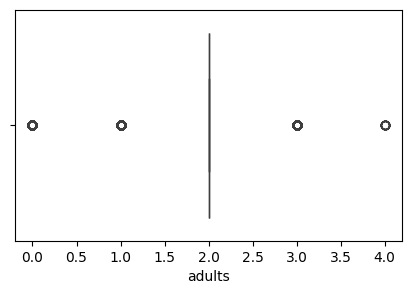

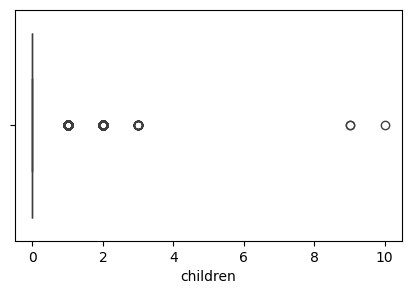

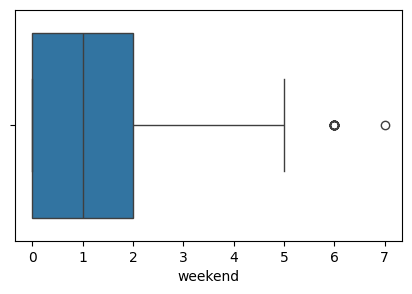

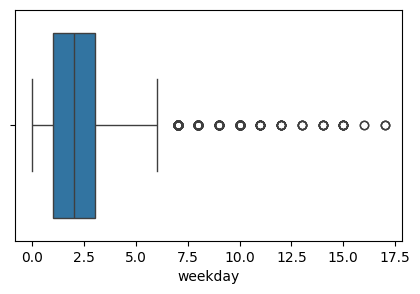

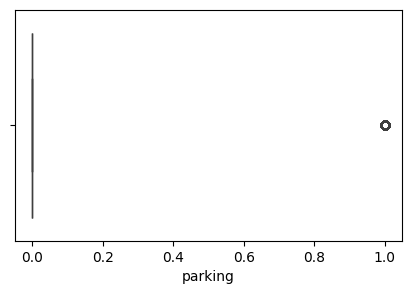

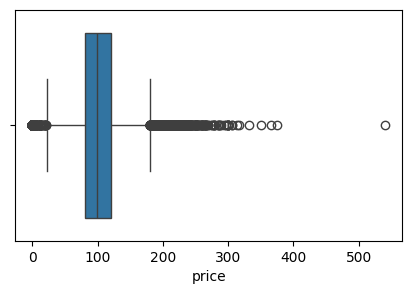

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,3))
  sns.boxplot(x=data3[i])

Winsorize will replace outliers

In [ ]:
Q1 = data3['price'].quantile(0.25)
Q3 = data3['price'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data3=data3[(data3['price'] >= lower) & (data3['price'] <= upper)]


In [ ]:
Q1 = data3['weekday'].quantile(0.25)
Q3 = data3['weekday'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data3=data3[(data3['weekday'] >= lower) & (data3['weekday'] <= upper)]

In [ ]:
x = data3.drop('booking_status', axis=1)
y = data3['booking_status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion Matrix:
[[4385  164]
 [2219   87]]

Accuracy: 0.6523705324580598
F1 Score: 0.06804849432929214
Precision: 0.3466135458167331
Recall: 0.03772766695576756


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = dt.predict(x_test)
acc1 = accuracy_score(y_test,y_pred1)
acc1

0.7524434719183078

In [ ]:
precision_score(y_test, y_pred1)

0.653555219364599

In [ ]:
recall_score(y_test, y_pred1)

0.562012142237641

In [ ]:
f1_score(y_test, y_pred1)

0.604336675215668

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,5,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],

}

tree_clf = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree_clf,params,scoring = 'f1', cv=3,n_jobs=-1, verbose =2)
tree_cv.fit(x_train,y_train)

best_params = tree_cv.best_params_
print(f"best param:{best_params})")

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
best param:{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'best'})


In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=2,min_samples_split=9,splitter='best')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=9)

In [ ]:
y_hat=dt1.predict(x_test)

In [ ]:
accur=accuracy_score(y_test,y_hat)
accur

0.7078045222465353

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80      4549
         1.0       0.63      0.32      0.43      2306

    accuracy                           0.71      6855
   macro avg       0.68      0.61      0.62      6855
weighted avg       0.69      0.71      0.68      6855



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(x_test)
acc3 = accuracy_score(y_test,y_pred3)
acc3

0.7553610503282275

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      4549
         1.0       0.65      0.58      0.61      2306

    accuracy                           0.76      6855
   macro avg       0.73      0.71      0.72      6855
weighted avg       0.75      0.76      0.75      6855



In [ ]:
#not doing tuning since score is good.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred4=gb.predict(x_test)


In [ ]:
print(accuracy_score(y_test,y_pred4))

0.6920495988329687


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81      4549
         1.0       0.72      0.14      0.23      2306

    accuracy                           0.69      6855
   macro avg       0.70      0.56      0.52      6855
weighted avg       0.70      0.69      0.61      6855

